Дисциплина «Искусственный интеллект»

Рабочая тетрадь № 7

# Нейронные сети


1.1. Теоретический материал – Нейронные сети

Обучение персептрона

Персептрон представляет собой элементарную часть нейронной сети.
Одиночный персептрон является линейным бинарным классификатором. В
этой лекции мы рассмотрим процедуру обучения персептрона для
классификации данных. Поскольку персептрон представляет собой
бинарный классификатор, то мы будем рассматривать лишь два класса.
Пусть мы рассматриваем некоторое множество (конечное или
бесконечное) n-мерных векторов, которые будем обозначать 𝑥 =
(𝑥1, 𝑥2, . . . , 𝑥𝑛)

Будем считать, что это множество разбивается на два класса, которые
мы будем обозначать +1 и -1. Поэтому возникает задача построения
функции, которая задана на нашем множестве векторов, и принимает
значения в множестве {+1, −1}. В качестве такой функции может выступать
персептрон. С алгебраической точки зрения персептрон состоит из вектора
весов 𝑤 = (𝑤0, 𝑤1, 𝑤2, . . . , 𝑤𝑛).

При этом персептрон работает по формуле
𝑦 = 𝑠𝑖𝑔𝑛(𝑤0 + 𝑥1𝑤1 + 𝑥2𝑤2 + . . . + 𝑥𝑛𝑤𝑛),
где функция 𝑠𝑖𝑔𝑛(𝑡) равна +1, если 𝑡 ≥ 0, и равна −1, если 𝑡 < 0.
Приведем алгоритм обучения персептрона. Пусть у нас есть набор
обучающих данных {(𝑥, 𝑑)}, где 𝑥 - это различные вектора, а 𝑑 из множества
{+1, −1} указывает к какому классу относится наш вектор.
1. Положим вектор весов 𝑤 равным нулю.
2. Повторять 𝑁 раз следующие шаги:
3. Для каждого тестового набора (𝑥, 𝑑):
4. Вычислить 𝑦 = 𝑠𝑖𝑔𝑛[(𝑥, 𝑤)].
5. Если 𝑦𝑑 < 0, то скорректировать веса 𝑤0 = 𝑤0 + 𝑎𝑑, 𝑤𝑖 =
𝑤𝑖 + 𝑎𝑑𝑥𝑖
, 𝑖 = 1,2, . . . , 𝑛.

Описанный алгоритм довольно легко программировать.

## Примеры

1.2.1 Пример

**Задача:**

Рассмотрим программу обучения персептрона на языке Python. Сначала
рассмотрим основной класс персептрона, который умеет учиться по
тестовым данным

Решение:

In [10]:
# класс, который реализует перспептрон и его обучение
class Perceptron:
    def __init__(self,N):
        # создать нулевые веса
        self.w = list()
        for i in range(N):
            self.w.append( 0)
    #метод для вычисления значения перспептрона
    def calc(self,x):
        res = 0
        for i in range(len(self.w)):
            res = res + self.w[i] * x[i]
        return res
    # пороговая функция активации перспептрона
    def sign(self,x):
        if self.calc(x) > 0:
            return 1
        else:
            return -1
    # обучение на одном примере
    def learn(self, la, x, y):
        #обучаем только, когда результат неверный
        if y * self.calc(x) <= 0:
            for i in range(len(self.w)):
                self.w[i] = self.w[i] + la * y * x[i]
    #обучение по всем данным Т - кортеж примеров
    def learning(self, la, T):
        #цикл обучения
        for n in range(100):
            #обучение по всем набору примеров
            for t in T:
                self.learn(la,t[0], t[1])

В строке 25 мы осуществляем корректировку весов. Посмотрим, как учится
и работает наш персептрон.

In [11]:
# создаем класс двумерного перспетрона
perceptron = Perceptron(2)
la = 0.1 # константа обучения
# создаём примеры
T = list()
T.append([[2,1],1])
T.append([[3,2],1])
T.append([[4,1],1])
T.append([[1,2],-1])
T.append([[2,3],-1])
T.append([[5,7],-1])
perceptron.learning(la,T) # обучение перспетрона
print(perceptron.w) # печатаем веса
# проверим работу на тестовых примерах
print(perceptron.sign([1.5, 2]))
print(perceptron.sign([3, 1.5]))
print(perceptron.sign([5, 1]))
print(perceptron.sign([5, 10]))

[0.1, -0.1]
-1
1
1
-1


Видим, что что наш персептрон отлично научился распознавать образы,
относя к классу 1 те вектора, у которых первая компонента больше второй,
и к классу -1 в противном случае. Хотя устройство персептронов довольно
простое эти конструкции могут решать и практические задачи. Кроме того,
из таких персептронов состоят нейронные сети.

# Реализация нейронной сети на Python

Нейронная сеть — это функциональная единица машинного или
глубокого обучения. Она имитирует поведение человеческого мозга,
поскольку основана на концепции биологических нейронных сетей.

Наиболее распространенный тип нейронной сети, называемый многослойным персептроном (MLP), представляет собой функцию, которая отображает входные данные в выходные данные. MLP имеет один входной слой и один выходной слой. Между ними может быть один или несколько скрытых слоев. Входной слой имеет тот же набор нейронов, что и признаки.
Скрытые слои также могут иметь более одного нейрона. Каждый нейрон представляет собой линейную функцию, к которой применяется функция
активации для решения сложных задач. Выход каждого слоя подается в
качестве входных данных для всех нейронов следующих слоев.

Нейронные сети способны решать множество задач. В основном они состоят из таких компонентов:

− входной слой (получение и передача данных);
− скрытый слой (вычисление);

− выходной слой. Чтобы реализовать нейросеть, необходимо понимать, как ведут себя нейроны. Нейрон одновременно
принимает несколько входов, обрабатывает эти данные и выдает
один выход. Нейронная сеть представляет собой блоки ввода и
вывода, где каждое соединение имеет соответствующие веса (это
сила связи нейронов; чем вес больше, тем один нейрон сильнее
влияет на другой). Данные всех входов умножаются на веса:

− 𝑥 → 𝑥 ∗ 𝑤1;

− 𝑦 → 𝑦 ∗ 𝑤2.

Входы после взвешивания суммируются с прибавлением значения
порога «c»:

𝑥𝑤1 + 𝑦𝑤2 + 𝑐

Полученное значение пропускается через функцию активации
(сигмоиду), которая преобразует входы в один выход:

𝑧 = 𝑓(𝑥𝑤1 + 𝑦𝑤2 + 𝑐).

Так выглядит сигмоида:

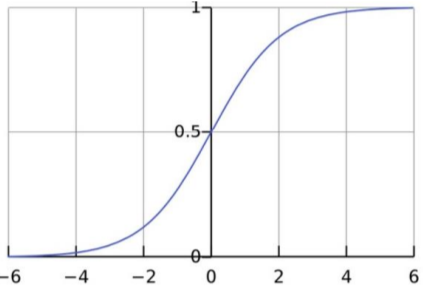

Интервал результатов сигмоиды — от 0 до 1. Отрицательные числа
стремятся к нулю, а положительные — к единице.

Например. Пусть нейрон имеет следующие значения: 𝑤 = [0,1] 𝑐 = 4.
Входной слой: 𝑥 = 2, 𝑦 = 3.

((𝑥𝑤1) + (𝑦𝑤2)) + 𝑐 = 20 + 31 + 4 = 7.
𝑧 = 𝑓(7) = 0.99.


## Примеры

1.1.2 Пример  
**Задание:**

Для написания кода нейрона будем использовать библиотеку Pytnon
— NumPy:

Решение:

In [2]:
import numpy as np
def sigmoid(x):
    # Функция активации: f(x) = 1 / (1 + e*(-x))
    return 1 / (1 + np.exp(-x))
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

weights = np.array([0, 1])  # w1 = 0, w2 = 1
bias = 4                    # с = 4
n = Neuron(weights, bias)
x = np.array([2, 3])        # x = 2, y = 3
print(n.feedforward(x))     # 0.9990889488055994

0.9990889488055994


Нейросеть состоит из множества соединенных между собой нейронов.
Пример несложной нейронной сети

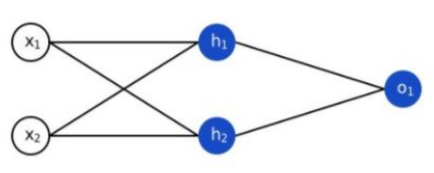

где:

𝑥1, 𝑥2 — входной слой;

ℎ1, ℎ2 — скрытый слой с двумя нейронами;
𝑜1 — выходной слой.

Например. Представим, что нейроны из графика выше имеют веса
[0, 1]. Пороговое значение (𝑏) у обоих нейронов равно 0 и они имеют
идентичную сигмоиду.

При входных данных 𝑥 = [2, 3] получим:
ℎ1 = ℎ2 = 𝑓(𝑤𝑥 + 𝑏) = 𝑓((02) + (1 ∗ 3) + 0) = 𝑓(3) = 0.95.
𝑜1 = 𝑓(𝑤 ∗ [ℎ1, ℎ2] + 𝑏) = 𝑓((0ℎ1) + (1ℎ2) + 0) = 𝑓(0.95) = 0.72.

Входные данные по нейронам передаются до тех пор, пока не
получатся выходные значения.

In [3]:
import numpy as np
class OurNeuralNetwork:
    def __init__(self):
        weights = np.array([0, 1])
        bias = 0
        # Knacc Neuron u3 предыдущего раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        # Входы для o1 — это входы h1 и h2
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        return out_o1

network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x)) # 0.7216325609518421

0.7216325609518421


# Обучение нейронной сети


Обучение нейросети — это подбор весов, которые соответствуют всем
входам для решения поставленных задач.

Класс нейронной сети:

In [12]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.share[1],4)
        self.weights2 = np.random.rand(4,1)
        self.y = y
        self.output = np.zero(y.shape)

Каждый этап процесса обучения состоит из:

− прямого распространения (прогнозируемый выход);

− обратного распространения (обновление весов и смещений).

Например:

Дана двуслойная нейросеть:
ŷ = 𝜎(𝑤2𝜎(𝑤1𝑥 + 𝑏1
) + 𝑏2
).

В данном случае на выход ŷ влияют только две переменные — 𝑤 (веса) и 𝑏
(смещение). Настройку весов и смещений из данных входа или процесс
обучения нейросети можно изобразить так:

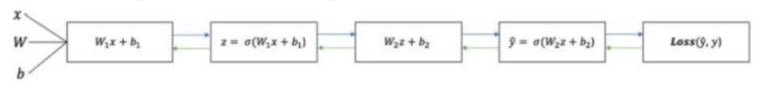

**Прямое распространение.**

Как видно, формула прямого распространения представляет собой
несложное вычисление:

ŷ = 𝜎(𝑤2𝜎(𝑤1𝑥 + 𝑏1) + 𝑏2)

Далее необходимо добавить в код функцию прямого распространения.
Предположим, что смещения в этом случае будут равны 0.


In [13]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.share[1],4)
        self.weights2 = np.random.rand(4,1)
        self.y = y
        self.output = np.zero(y.shape)
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.input, self.weights1))

Чтобы вычислить ошибку прогноза, необходимо использовать функцию
потери. В примере уместно воспользоваться формулой суммы квадратов
ошибок — средним значением между прогнозируемым и фактическим
результатами:

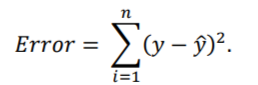

**Обратное распространение**

Обратное распространение позволяет измерить производные в
обратном порядке — от конца к началу, и скорректировать веса и смещения.
Для этого необходимо узнать производную функции потери — тангенс угла
наклона.

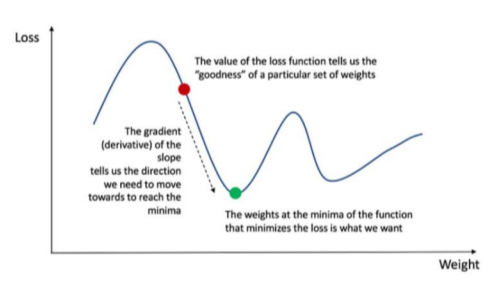

Производная функции по отношению к весам и смещениям позволяет
узнать градиентный спуск. Производная функции потери не содержит весов
и смещений, для ее вычисления необходимо добавить правило цепи:

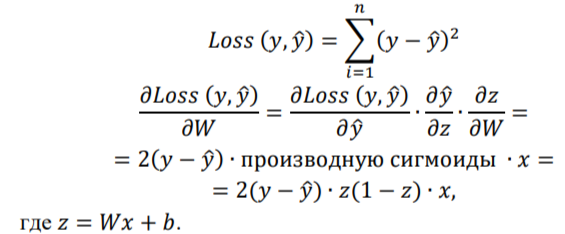

Благодаря этому правилу можно регулировать веса. Добавляем в код
Python функцию обратного распространения:

In [14]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.share[1],4)
        self.weights2 = np.random.rand(4,1)
        self.y = y
        self.output = np.zero(y.shape)
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.input, self.weights1))
    def backprop(self):
        # Применение правила цепи для нахождения производной функции потерь по весу2 и весу1
        d_weights2 = np.dot(self.layer1.T, (2 * (self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2 * (self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        # Обновление веса производной (наклона) функции потерь
        self.weights1 += d_weights1
        self.weights2 += d_weights2

Нейронные сети базируются на определенных алгоритмах и
математических функциях. Сначала может казаться, что разобраться в них
довольно сложно. Но существуют готовые библиотеки машинного обучения
для построения и тренировки нейросетей, позволяющие не углубляться в их
устройство.

## Задание

Реализовать классы нейросетей по аналогии с классом OurNeuralNetwork.

Данные нейросети:

− три входа (𝑥1, 𝑥2, 𝑥3
);

− три нейрона в скрытых слоях (ℎ1, ℎ2, ℎ3);

− выход (𝑜1).

Нейроны имеют идентичные веса и пороги:

− 𝑤 = [0.5, 0.5, 0.5]

− 𝑏 = 0

Данные нейросети:

− два входа (𝑥1, 𝑥2);

− два нейрона в скрытых слоях (ℎ1, ℎ2);

− два выхода (𝑜1, 𝑜2
).

Нейроны имеют идентичные веса и пороги:

− 𝑤 = [1, 0];

− 𝑏 = 1.

In [21]:
import numpy as np

def sigmoid(x):
    return 1 / (1+np.exp(-x))

class Neuron1:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward (self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

class OurNeuralNetwork:
    def __init__(self):
        weights = np.array([0.5, 0.5, 0.5])
        bias = 0
        self.h1 = Neuron1(weights, bias)
        self.h2 = Neuron1(weights, bias)
        self.h3 = Neuron1(weights, bias)
        self.o1 = Neuron1(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1

network = OurNeuralNetwork()
x = np.array ([2, 3, 4])
print (network.feedforward(x))

0.8151036049051821


In [22]:
class OurNeuralNetwork:
    def __init__(self):
        weights = np.array([1,0])
        bias = 1

        self.h1 = Neuron1(weights, bias)
        self.h2 = Neuron1(weights, bias)
        self.o1 = Neuron1(weights, bias)
        self.o2 = Neuron1(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedforward(np.array([out_h1, out_h2]))
        return out_o1, out_o2

network = OurNeuralNetwork()
x = np.array ([2, 3])
print (network.feedforward(x))

(0.8757270529783324, 0.8757270529783324)


1.3.2 Задание

Реализуйте классы нейронных сетей с использованием других функций
активации

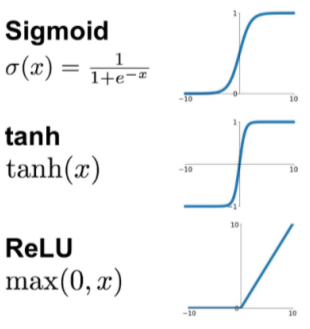

In [29]:
import numpy as np

def sigmoid(x):
    z = np.exp(-x)
    sig = 1 / (1 + z)
    return sig

class Neuron1:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward (self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

class OurNeuralNetwork:
    def __init__(self):
        weights = np.array([0.5, 0.5, 0.5])
        bias = 0
        self.h1 = Neuron1(weights, bias)
        self.h2 = Neuron1(weights, bias)
        self.h3 = Neuron1(weights, bias)
        self.o1 = Neuron1(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1

class OrNeuralNetwork:
    def __init__(self):
        weights = np.array([1,0])
        bias = 1

        self.h1 = Neuron1(weights, bias)
        self.h2 = Neuron1(weights, bias)
        self.o1 = Neuron1(weights, bias)
        self.o2 = Neuron1(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedforward(np.array([out_h1, out_h2]))
        return out_o1, out_o2


network = OurNeuralNetwork()
x = np.array ([2, 3, 4])
print (network.feedforward(x))



0.8151036049051821


In [ ]:
def tanh(x):
    return np.tan(x)
class Neuron2:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward (self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return tanh(total)
class OurNeuralNetwork:
    def __init__(self):
        weights = np.array([0.5, 0.5, 0.5])
        bias = 0
        self.h1 = Neuron2(weights, bias)
        self.h2 = Neuron2(weights, bias)
        self.h3 = Neuron2(weights, bias)
        self.o1 = Neuron2(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1

network = OurNeuralNetwork()
x = np.array ([2, 3, 4])
print (network.feedforward(x))

In [25]:
import numpy as np

def relu(x):
        return (np.maximum(0, x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return relu(total)

class OurNeuralNetwork1:
    def __init__(self):
        weights = np.array([0.5, 0.5, 0.5])
        bias = 0
        # Класс Neuron из предыдущего раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.h3 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)
        # Входы для o1 - это выходы h1, h2, h3
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1
network = OurNeuralNetwork1()
x = np.array([2, 3, 4])
print(network.feedforward(x))

6.75


# Введение в нейронные сети с помощью Scikit-Learn в Python


Теперь мы знаем, что такое нейронные сети и какие шаги необходимо
выполнить, чтобы построить простую нейронную сеть с плотными связями.
В этом разделе мы попытаемся построить простую нейронную сеть, которая
предсказывает класс, к которому принадлежит данное растение ириса. Мы
будем использовать библиотеку Python Scikit-Learn для создания нашей
нейронной сети.

Sklearn предоставляет 2 оценщика для задач классификации и
регрессии соответственно:

− MLPClassifier;

− MLPRegressor

Начнем с импорта необходимых библиотек

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# MLPClassifier

Загрузка данных

Мы будем загружать два набора данных.

Набор данных цифр: мы будем использовать набор данных цифр, который имеет изображения размером 8x8 для цифр 0-9. Ниже мы будем использовать цифровые данные для задач классификации.

Набор данных о жилье в Бостоне: мы будем использовать набор данных о жилье в Бостоне, который содержит информацию о различных свойствах дома, таких как среднее количество комнат, уровень преступности на душу населения в городе и т. д. Мы будем использовать его для задач регрессии.

Sklearn предоставляет оба этих набора данных. Мы можем загрузить их, вызвав методы load_digits() и load_boston().

В связи с тем, что данные метода не удаётся вызвать в связи с ограничениями, будет использоваться прямая ссылка на данные.

In [83]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
from sklearn.datasets import load_digits
housing = load_digits()

from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)

digits = load_digits()
X_digits, Y_digits = digits.data, digits.target
print('Размеры набора данных: ', X_digits.shape, Y_digits.shape)

boston = load_digits()
X_boston, Y_boston = boston.data, boston.target
print('Размеры набора данных: ', X_boston.shape, Y_boston.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Размеры набора данных:  (1797, 64) (1797,)
Размеры набора данных:  (1797, 64) (1797,)


Классификация

MLPClassifier — это класс, доступный как часть модуля neuro_network
sklearn для выполнения задач классификации с использованием
многослойного персептрона.
Как обычно разделим набор данных на две части:

− данные обучения, которые будут использоваться для модели
обучения;

− тестовые данные, по которым будет проверяться точность
обученной модели.

Функция train_test_split модуля model_selection sklearn поможет нам
разделить данные на два набора: 80% для обучения и 20% для тестирования.
Мы также используем seed(random_state=123) с train_test_split, чтобы мы
всегда получали одно и то же разделение и могли сравнивать и
воспроизволить результаты в будущем.


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_digits, Y_digits, train_size=0.80, test_size=0.20, stratify=Y_digits, random_state=123)
print('Train/Test Sizes:', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


Train/Test Sizes: (1437, 64) (360, 64) (1437,) (360,)


Для начала натренируем модель MLPClassifier с параметрами по умолчанию
для тренировочных данных.

In [61]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(random_state=123)
mlp_classifier.fit(X_train, Y_train)


MLPClassifier(random_state=123)

In [62]:
y_preds = mlp_classifier.predict(X_test)

print(y_preds[:15])
print(Y_test[:15])
# Метод Score для оценки точности модели классификации.
print('Test Accuracy : %.3f' % mlp_classifier.score(X_test, Y_test))

print('Training Accuracy : %.3f' % mlp_classifier.score(X_train, Y_train))


[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
Test Accuracy : 0.983
Training Accuracy : 1.000


Cоздадим метод plot_confusion_matrix(), который принимает исходные и
предсказанные метки данных по модели. Затем он строит матрицу путаницы,
используя matplotlib

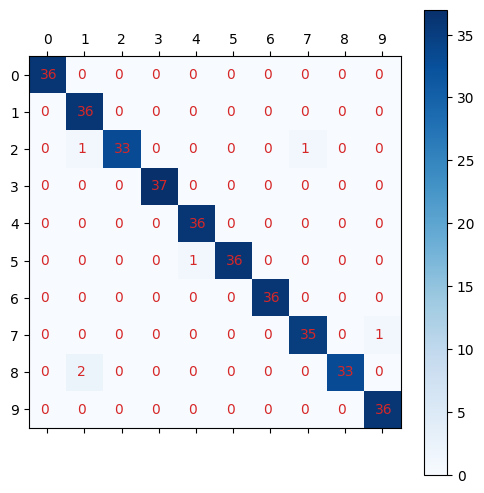

In [80]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    fig = plt.figure(figsize=(6, 6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(10), range(10))
    plt.xticks(range(10), range(10))
    plt.colorbar()
    for i in range(10):
        for j in range(10):
            plt.text(i - 0.2, j + 0.1, str(conf_mat[j, i]), color='tab:red')

# Пример использования:
plot_confusion_matrix(Y_test, mlp_classifier.predict(X_test))

Ниже приведен список важных атрибутов, доступных с MLPClassifier,
которые могут предоставить значимую информацию после обучения
модели.

− loss_ — возвращает убыток после завершения процесса обучения.

− coefs_ — возвращает массив длины n_layers-1, где каждый элемент
представляет веса, связанные с уровнем i.

− intercepts_ — возвращает массив длины n_layers-1, где каждый
элемент представляет собой перехват, связанный с персептронами
слоя i.

− n_iter_ — количество итераций, для которых выполнялась оценка.

− out_activation_ — возвращает имя функции активации выходного
слоя.

In [81]:
print('Loss: ', mlp_classifier.loss_)
print('Number of Coefs: ', len(mlp_classifier.coefs_))
print('Number of Intercepts: ', len(mlp_classifier.intercepts_))
print('Number of Iteration for Which Estimator Ran: ', mlp_classifier.n_iter_)
print('Name of Output Layer Activation Function: ', mlp_classifier.out_activation_)

Loss:  0.0034728684994180608
Number of Coefs:  2
Number of Intercepts:  2
Number of Iteration for Which Estimator Ran:  125
Name of Output Layer Activation Function:  softmax


# MLPRegressor

MLPRegressor — это класс, доступный как часть библиотеки
neuro_network sklearn для выполнения задач регрессии с использованием
многослойного персептрона. Также разделим набор данных на две части:

− данные обучения (80%), которые будут использоваться для
модели обучения;

− тестовые данные (20%), по которым будет проверяться точность
обученной модели

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X_boston, Y_boston, train_size = 0.80, test_size = 0.20, random_state = 123)
print ('Train/Test Sizes : ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sizes :  (1437, 64) (360, 64) (1437,) (360,)


In [88]:
from sklearn.neural_network import MLPRegressor

mlp_regressor = MLPRegressor(random_state=123)
mlp_regressor.fit(X_train, Y_train)

MLPRegressor(random_state=123)

In [89]:
Y_preds = mlp_regressor.predict(X_test)

print (Y_preds[:10])
print (Y_test[:10])
print ('Test R^2 Score: %.3f'%mlp_regressor.score(X_test, Y_test))
print ('Training R^2 Score: %.3f'%mlp_regressor.score(X_train, Y_train))

[3.42060853 4.53357389 5.11138414 2.52091185 1.69924804 4.3939812
 0.29689434 0.75905644 7.45193334 3.2841093 ]
[3 3 4 4 1 3 1 0 7 4]
Test R^2 Score: 0.858
Training R^2 Score: 0.964


In [90]:
print ('Loss: ', mlp_regressor.loss_)
print ('Number of Coefs: ', len(mlp_regressor.coefs_))
print ('Number of Intercepts: ', len(mlp_regressor.intercepts_))
print ('Number of Iteration for Which Estimator Ran: ', mlp_regressor.n_iter_)
print ('Name of Output Layer Activation Function: ', mlp_regressor.out_activation_)

Loss:  0.13101948536885977
Number of Coefs:  2
Number of Intercepts:  2
Number of Iteration for Which Estimator Ran:  149
Name of Output Layer Activation Function:  identity


## Задание

1.3.1 Задание

Используйте классы MLPClassified и MLPRegressor для классификации и
регрессии произвольных данных из интернета. Проведите анализ
атрибуты, полученных моделей.
Для классификации можете взять набор данных Ирисов:
https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f
7d537619d0e07d5ae3/iris.csv
а для регрессии датасет зависимости заработной платы от опыта работы:
https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv


Решение:

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


['Versicolor' 'Setosa' 'Virginica' 'Virginica' 'Setosa' 'Setosa'
 'Virginica' 'Virginica' 'Virginica' 'Setosa' 'Setosa' 'Versicolor'
 'Virginica' 'Versicolor' 'Virginica']
80     Versicolor
45         Setosa
144     Virginica
110     Virginica
38         Setosa
2          Setosa
135     Virginica
72     Versicolor
138     Virginica
34         Setosa
19         Setosa
77     Versicolor
101     Virginica
63     Versicolor
117     Virginica
Name: variety, dtype: object
Test Accuracy : 0.933
Training Accuracy : 0.983
[[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]
Loss :  0.29887893401974336
Number of Coefs :  2
Number of Intercepts :  2
Number of Iterations for Which Estimator Ran :  200
Name of Output Layer Activation Function :  softmax


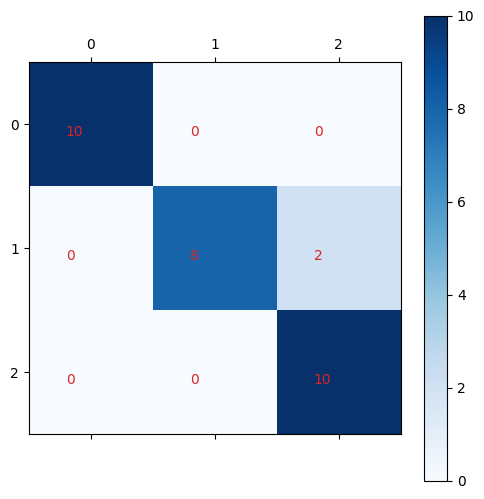

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_preds):
    conf_mat = confusion_matrix(y_test, y_preds)
    print(conf_mat)
    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(3), range(3))
    plt.xticks(range(3), range(3))
    plt.colorbar();
    for i in range(3):
        for j in range(3):
            plt.text(i-0.2,j+0.1, str(conf_mat[j, i]), color='tab:red')

url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
dataframe = pd.read_csv(url)
x = dataframe.iloc[:, :-1]
y = dataframe.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80, test_size=0.20, stratify=y, random_state=123)

mlp_classifier = MLPClassifier(random_state=123)
mlp_classifier.fit(x_train, y_train)
y_preds = mlp_classifier.predict(x_test)

print(y_preds[:15])
print(y_test[:15])

print('Test Accuracy : %.3f'%mlp_classifier.score(x_test, y_test))
print('Training Accuracy : %.3f'%mlp_classifier.score(x_train, y_train))
plot_confusion_matrix(y_test, y_preds)
print("Loss : ", mlp_classifier.loss_)
print("Number of Coefs : ", len(mlp_classifier.coefs_))
print("Number of Intercepts : ", len(mlp_classifier.intercepts_))
print("Number of Iterations for Which Estimator Ran : ", mlp_classifier.n_iter_)
print("Name of Output Layer Activation Function : ", mlp_classifier.out_activation_)

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import confusion_matrix

url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
dataframe = pd.read_csv(url)
x = dataframe.iloc[:, :-1]
y = dataframe.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80, test_size=0.20, random_state=123)

mlp_regressor = MLPRegressor(random_state=123)
mlp_regressor.fit(x_train, y_train)

y_preds = mlp_regressor.predict(x_test)

print(y_preds[:10])
print(y_test[:10])

print('Test R^2 Score : %.3f'%mlp_regressor.score(x_test, y_test))
print('Training R^2 Score : %.3f'%mlp_regressor.score(x_train, y_train))

print("Loss : ", mlp_regressor.loss_)
print("Number of Coefs : ", len(mlp_regressor.coefs_))
print("Number of Intercepts : ", len(mlp_regressor.intercepts_))
print("Number of Iterations for Which Estimator Ran : ", mlp_regressor.n_iter_)
print("Name of Output Layer Activation Function : ", mlp_regressor.out_activation_)

[20.26234628 55.2781752  18.82135812 50.48274487 20.26234628 50.9622879 ]
7      54445.0
29    121872.0
5      56642.0
26    116969.0
8      64445.0
27    112635.0
Name: Salary, dtype: float64
Test R^2 Score : -8.796
Training R^2 Score : -8.261
Loss :  2988058032.1601596
Number of Coefs :  2
Number of Intercepts :  2
Number of Iterations for Which Estimator Ran :  200
Name of Output Layer Activation Function :  identity


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
